<a href="https://colab.research.google.com/github/prateeksingh2001/FDS_Labwork/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

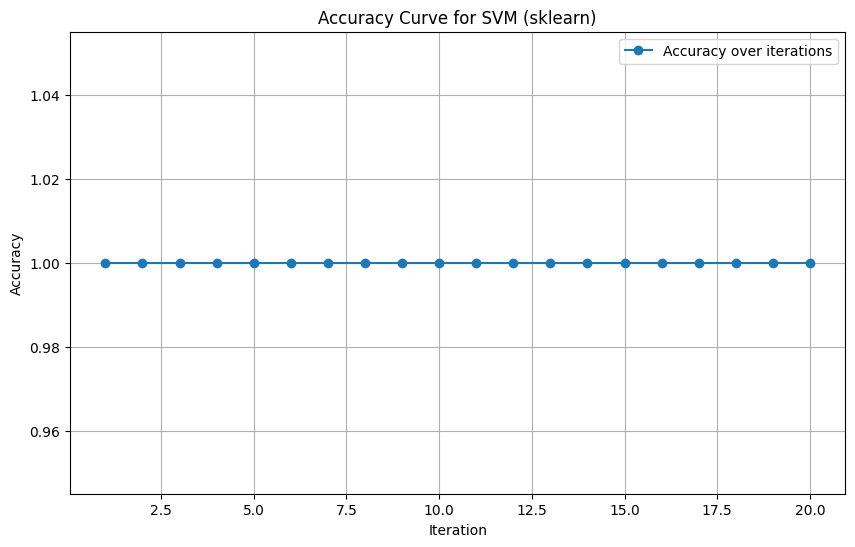

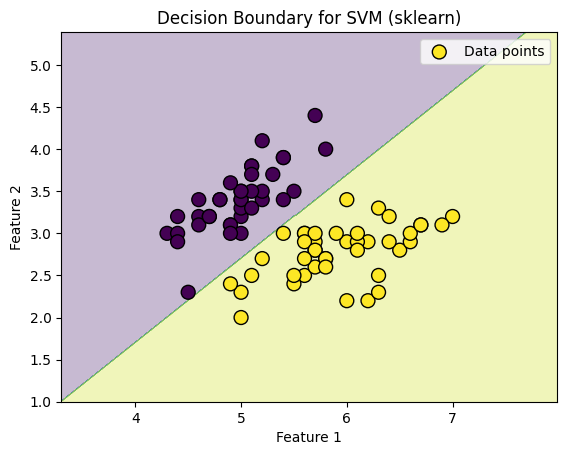

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset and use only two features for easy visualization
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Use first 100 samples and first two features for binary classification
y = iris.target[:100]  # Only first two classes (0, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM classifier from sklearn
svm_classifier = SVC(kernel='linear')

# Train the model and plot accuracy over iterations (we simulate iterations with different data splits)
accuracies = []

# For plotting accuracy curve, we split the data multiple times to simulate training iterations
for i in range(1, 21):  # 20 iterations
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    svm_classifier.fit(X_train_split, y_train_split)
    y_pred = svm_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', label="Accuracy over iterations")
plt.title("Accuracy Curve for SVM (sklearn)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=100, edgecolor='k', label='Data points')
    plt.title("Decision Boundary for SVM (sklearn)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, svm_classifier)


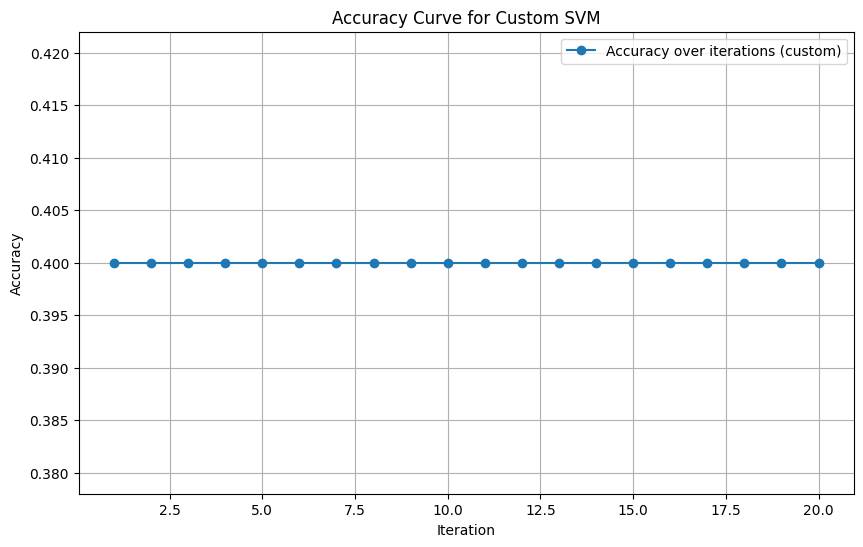

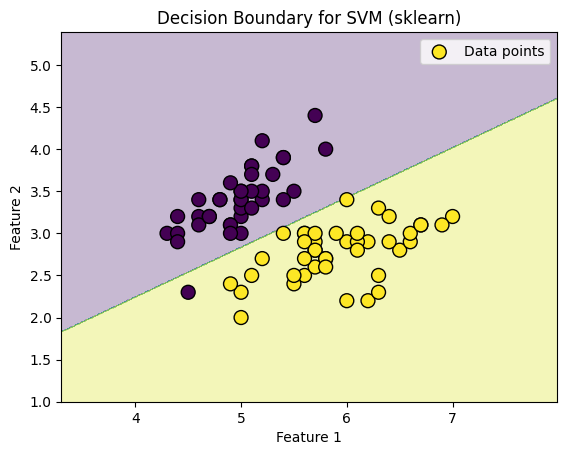

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Custom SVM Training
svm = SVM(n_iters=100)
accuracies_custom = []

# Simulating multiple iterations
for i in range(1, 21):
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    svm.fit(X_train_split, y_train_split)
    y_pred = svm.predict(X_test)
    acc = np.mean(y_pred == y_test)
    accuracies_custom.append(acc)

# Plot accuracy curve for custom SVM
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies_custom, marker='o', label="Accuracy over iterations (custom)")
plt.title("Accuracy Curve for Custom SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary for custom SVM
plot_decision_boundary(X_train, y_train, svm)


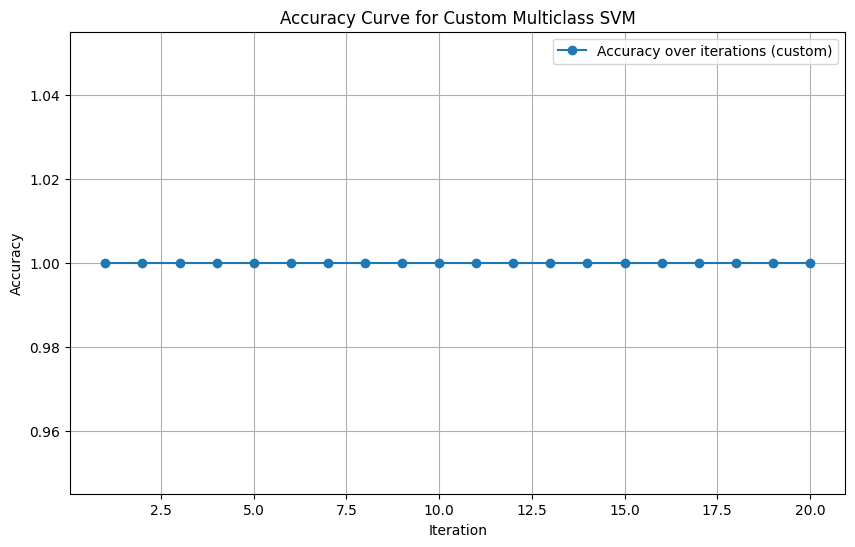

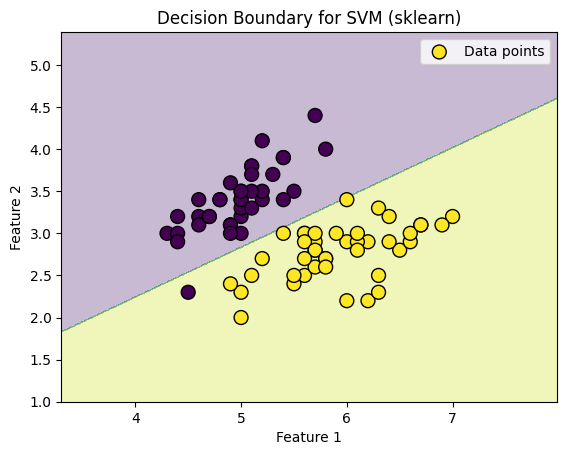

In [ ]:
class CustomSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

class OneVsRestSVM:
    def __init__(self, n_classes, **kwargs):
        self.n_classes = n_classes
        self.classifiers = [CustomSVM(**kwargs) for _ in range(n_classes)]

    def fit(self, X, y):
        for i in range(self.n_classes):
            y_binary = np.where(y == i, 1, 0)
            self.classifiers[i].fit(X, y_binary)

    def predict(self, X):
        scores = np.array([clf.predict(X) for clf in self.classifiers])
        return np.argmax(scores, axis=0)

# Training Custom One-vs-Rest SVM
ovr_svm = OneVsRestSVM(n_classes=3, n_iters=100)

# Track accuracy over multiple iterations
accuracies_custom = []
for i in range(1, 21):  # 20 iterations
    X_train_split, _, y_train_split, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    ovr_svm.fit(X_train_split, y_train_split)
    y_pred = ovr_svm.predict(X_test)
    acc = np.mean(y_pred == y_test)
    accuracies_custom.append(acc)

# Plot accuracy curve for custom One-vs-Rest SVM
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies_custom, marker='o', label="Accuracy over iterations (custom)")
plt.title("Accuracy Curve for Custom Multiclass SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary for custom One-vs-Rest SVM
plot_decision_boundary(X_train, y_train, ovr_svm)
